In [35]:
print("sonamu")

sonamu


In [36]:
# !pip install scikit-learn

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform
import os
import glob

pd.set_option('display.float_format',"{:.2f}".format)

# OS에 따라 다른 폰트 지정
if platform.system() == 'Darwin':   # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux (예: Colab, Ubuntu)
    plt.rcParams['font.family'] = 'NanumGothic'

mpl.rcParams['axes.unicode_minus'] = False

file_path = "2024.csv"
whole_df = pd.read_csv(file_path,encoding='cp949', parse_dates=["계약일","취소일"])

C:\Users\user\AppData\Local\Temp\ipykernel_6336\131332688.py:26: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  whole_df = pd.read_csv(file_path,encoding='cp949', parse_dates=["계약일","취소일"])


In [38]:
df = whole_df.copy()

In [39]:
df.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11380,은평구,10200,녹번동,1.00,대지,86.00,125.00,성원빌라(86-125),...,16400,53.07,25.00,4.00,NaN,NaT,1991.00,연립다세대,중개거래,서울 은평구
1,2024,11500,강서구,10300,화곡동,1.00,대지,924.00,4.00,팔팔빌라,...,35000,39.24,27.00,2.00,NaN,NaT,1986.00,연립다세대,직거래,NaN
2,2024,11560,영등포구,11100,당산동1가,1.00,대지,143.00,0.00,다솔시티하임,...,30000,29.54,14.00,5.00,NaN,NaT,2017.00,연립다세대,직거래,NaN
3,2024,11560,영등포구,12800,양평동4가,1.00,대지,220.00,0.00,해울빌,...,36000,40.41,63.64,3.00,NaN,NaT,2021.00,오피스텔,중개거래,서울 용산구
4,2024,11410,서대문구,11200,대현동,1.00,대지,90.00,77.00,유씨유 이대,...,19300,17.31,30.87,5.00,NaN,NaT,2018.00,오피스텔,중개거래,서울 서대문구


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
df.head().T

,0,1,2,3,4
접수연도,2024,2024,2024,2024,2024
자치구코드,11380,11500,11560,11560,11410
자치구명,은평구,강서구,영등포구,영등포구,서대문구
법정동코드,10200,10300,11100,12800,11200
법정동명,녹번동,화곡동,당산동1가,양평동4가,대현동
지번구분,1.00,1.00,1.00,1.00,1.00
지번구분명,대지,대지,대지,대지,대지
본번,86.00,924.00,143.00,220.00,90.00
부번,125.00,4.00,0.00,0.00,77.00
건물명,성원빌라(86-125),팔팔빌라,다솔시티하임,해울빌,유씨유 이대


## 확률 분포 그려보기

In [42]:
df = whole_df[['건물명','자치구코드', '자치구명', '법정동코드', '법정동명','층','건물용도','물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)','계약일']]
df.columns = ['건물명','자치구코드', '자치구명', '법정동코드', '법정동명','층','건물용도','물건금액', '건물면적', '토지면적','계약일']

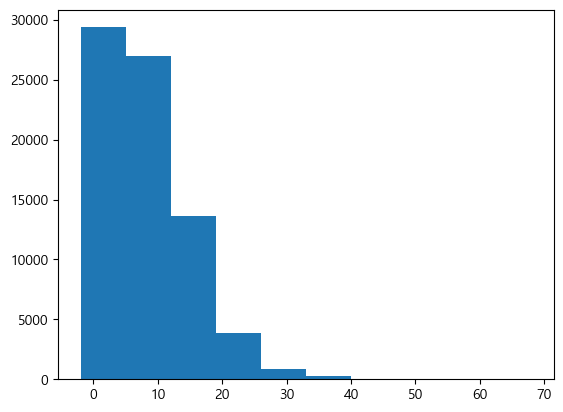

In [43]:
plt.hist(df['층'])
plt.show()

In [44]:
df.describe()   #숫자형만 쫙~~ 아재밋다 신기능

,자치구코드,법정동코드,층,물건금액,건물면적,토지면적,계약일
count,77523.00,77523.00,74965.00,77523.00,77523.00,72446.00,77523
mean,11456.36,10948.61,7.89,88598.66,68.03,18.65,2024-05-24 23:35:51.139661824
min,11110.00,10100.00,-2.00,2600.00,8.48,0.00,2021-02-08 00:00:00
25%,11305.00,10200.00,3.00,32000.00,41.85,0.00,2024-03-27 00:00:00
50%,11470.00,10600.00,6.00,66000.00,59.92,0.00,2024-06-05 00:00:00
75%,11620.00,11000.00,11.00,115000.00,84.87,27.00,2024-07-24 00:00:00
max,26230.00,18700.00,68.00,2850000.00,2932.27,30822.00,2024-10-14 00:00:00
std,186.07,1228.36,6.32,87195.98,53.12,122.38,NaN


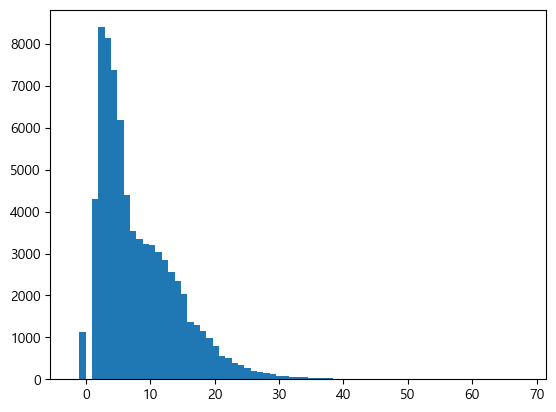

In [45]:
plt.hist(df['층'],bins=71)  #bins로 구간 쪼개~
plt.show()

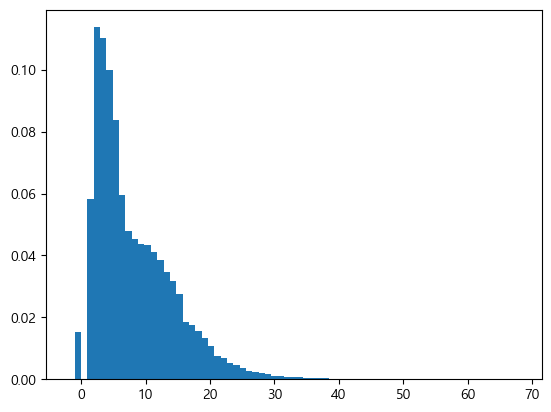

In [46]:
plt.hist(df['층'],bins=71,density=True)   #density=True로 비율로 전환
plt.show()

In [47]:
### 층에 대한 확률 분포?

In [48]:
df['층'].value_counts() #빈도수가 따로 나오니까 첫번째 그래프대로 할 필요가 없군.. 보고싶으면 이걸롭 ㅗ면 되겟다

층
2.00     8403
3.00     8148
4.00     7379
5.00     6188
6.00     4407
         ... 
60.00       1
48.00       1
67.00       1
53.00       1
64.00       1
Name: count, Length: 63, dtype: int64

In [49]:
df['층'].value_counts(normalize=True,ascending=False)
    #normalize=True 정상화? 아 표준화~~
    #ascending=False 내림차순

층
2.00    0.11
3.00    0.11
4.00    0.10
5.00    0.08
6.00    0.06
        ... 
60.00   0.00
48.00   0.00
67.00   0.00
53.00   0.00
64.00   0.00
Name: proportion, Length: 63, dtype: float64

- 2024년 거래된 매물이 2층이 차지하는 비율이 약 12%에 달한다. <br>
- 2024년 거래된 매물 중에서 아무거나 1개를 선택했을 때, 2층일 확률이 12%이다.
- -> 2층의 비중 12% = 2층일 가능성 12% (확률)

## 표준화

In [50]:
multiplex_house_df = df.loc[df['건물용도']=='연립다세대']

In [51]:
multiplex_house_df.describe()

,자치구코드,법정동코드,층,물건금액,건물면적,토지면적,계약일
count,21184.00,21184.00,21184.00,21184.00,21184.00,21184.00,21184
mean,11443.36,10850.44,3.03,35977.49,45.19,29.49,2024-05-18 17:47:49.939577088
min,11110.00,10100.00,-2.00,2600.00,8.48,3.00,2022-07-08 00:00:00
25%,11305.00,10200.00,2.00,22300.00,29.93,19.00,2024-03-15 00:00:00
50%,11440.00,10500.00,3.00,30000.00,43.02,25.00,2024-05-23 00:00:00
75%,11590.00,10900.00,4.00,40500.00,55.43,32.00,2024-07-26 00:00:00
max,11740.00,18700.00,18.00,1085000.00,288.40,30822.00,2024-10-14 00:00:00
std,168.34,1156.68,1.88,32384.20,19.72,212.72,NaN


In [52]:
### 이상치 제거
# IQR 방식의 이상치 제거
area_data = multiplex_house_df['토지면적'].values #values만 보면 뭐가 달라요? -> 리스트 형태로 나온다?
q_1 = np.percentile(area_data, q=25)
q_3 = np.percentile(area_data,q=75)
iqr = q_3 - q_1

In [53]:
lower_whisker = q_1 - 1.5 * iqr 
upper_whisker = q_3 + 1.5 * iqr

In [54]:
## 이상치 제거한 데이터 나오게끔 해보기!
multiplex_house_df_cleaned = multiplex_house_df.loc[(multiplex_house_df['토지면적']>=lower_whisker)&(multiplex_house_df['토지면적']<=upper_whisker)]

## between 방식도 됨
multiplex_house_df.loc[multiplex_house_df['토지면적'].between(lower_whisker,upper_whisker)]

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일
0,성원빌라(86-125),11380,은평구,10200,녹번동,4.00,연립다세대,16400,53.07,25.00,2024-10-14
1,팔팔빌라,11500,강서구,10300,화곡동,2.00,연립다세대,35000,39.24,27.00,2024-10-14
2,다솔시티하임,11560,영등포구,11100,당산동1가,5.00,연립다세대,30000,29.54,14.00,2024-10-14
9,진광,11500,강서구,10600,내발산동,1.00,연립다세대,15900,37.98,20.00,2024-10-14
11,오복홈타운,11590,동작구,10200,상도동,2.00,연립다세대,30000,62.30,43.00,2024-10-14
...,...,...,...,...,...,...,...,...,...,...,...
77505,그레이스빌2차A,11440,마포구,12200,합정동,5.00,연립다세대,26300,22.44,12.65,2023-11-13
77509,(243-9),11170,용산구,13000,이태원동,1.00,연립다세대,39100,40.48,36.00,2023-08-30
77512,가온리치빌(씨동),11305,강북구,10300,수유동,2.00,연립다세대,23000,29.64,21.54,2023-04-07
77513,(410-23),11440,마포구,12300,망원동,2.00,연립다세대,20000,23.82,16.00,2023-03-13


In [55]:
# 오복홈타운의 데이터 확인하기 
multiplex_house_df_cleaned.loc[multiplex_house_df_cleaned['건물명']=='오복홈타운']

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일
11,오복홈타운,11590,동작구,10200,상도동,2.00,연립다세대,30000,62.30,43.00,2024-10-14


- 연립다세대주택 중에서 오복홈타운의 건물 면적과 토지면적은 높은 편일까? 
  - => 평균보다 높은가? 
- 만약 둘 다 높다고 나온다면, 오복홈타운의 건물면적과 토지면적 중 어떤 면적이 평균에서 더 멀리 떨어져있을까?
  - 표준 편차 구하기네?

  - 그럼 먼저 표준화를 진행해야 겠다
  - 표준화해야지 -> 표준 점수 (Z-score) 구하기 : 각 면적에서 평균을 빼고 표준편차로 나누면, 평균으로부터 표준편차의 몇 배만큼 떨어져 있는가?를 알 수 있으니까
  - 내 값 - 평균 / 표준편차

##### 너 누구니 scaler
    - sklearn에서 태어난 아이
- StandardScaler : Z-score을 만드는 애. 데이터를 평균 0, 표준편차 1로 만듦 (정규분포 따를 때 유리하겟지?)
- MinMaxScaler : 데이터를 0~1로 압축해서 최솟값은 0, 최댓값은 1이 됨 (데이터의 분포가 정규분포가 아닐 때 자주 씀)

##### 단계별
1. scaler.fit() : 음 이곳의 평균(μ)은 얼마고 표준편차(σ)는 어떻구나 알려줌
2. scaler.transform() : ↑를 바탕으로 실제로 Z-score로 계산해줌
3. scaler.fit_transform() : 1~2를 한번에 처리해줌


- scaler.fit_transform(df[['컬럼명']]) ▶ 왜 대괄호?
    - scaler는 까다로워서 2차원 데이터(df)만 받아 먹음
        - df['건물면적'] (1차원) : 안먹어 퉷퉷
        - df[['건물면적']] (2차원) : 음~ 마트다녀오셨어요?

In [58]:
#연립다세대주택 중에서 오복홈타운의 건물 면적과 토지면적은 높은 편일까? 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   #표준화 -> 표준정규분포로 만들어주는 것

multiplex_house_df_cleaned['건물면적_표준화']=  scaler.fit_transform(multiplex_house_df_cleaned[['건물면적']])
multiplex_house_df_cleaned['토지면적_표준화']=  scaler.fit_transform(multiplex_house_df_cleaned[['토지면적']])

C:\Users\user\AppData\Local\Temp\ipykernel_6336\4121635762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiplex_house_df_cleaned['건물면적_표준화']=  scaler.fit_transform(multiplex_house_df_cleaned[['건물면적']])
C:\Users\user\AppData\Local\Temp\ipykernel_6336\4121635762.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiplex_house_df_cleaned['토지면적_표준화']=  scaler.fit_transform(multiplex_house_df_cleaned[['토지면적']])


In [59]:
multiplex_house_df_cleaned

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일,건물면적_표준화,토지면적_표준화
0,성원빌라(86-125),11380,은평구,10200,녹번동,4.00,연립다세대,16400,53.07,25.00,2024-10-14,0.63,-0.02
1,팔팔빌라,11500,강서구,10300,화곡동,2.00,연립다세대,35000,39.24,27.00,2024-10-14,-0.26,0.21
2,다솔시티하임,11560,영등포구,11100,당산동1가,5.00,연립다세대,30000,29.54,14.00,2024-10-14,-0.89,-1.28
9,진광,11500,강서구,10600,내발산동,1.00,연립다세대,15900,37.98,20.00,2024-10-14,-0.34,-0.59
11,오복홈타운,11590,동작구,10200,상도동,2.00,연립다세대,30000,62.30,43.00,2024-10-14,1.23,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77505,그레이스빌2차A,11440,마포구,12200,합정동,5.00,연립다세대,26300,22.44,12.65,2023-11-13,-1.35,-1.44
77509,(243-9),11170,용산구,13000,이태원동,1.00,연립다세대,39100,40.48,36.00,2023-08-30,-0.18,1.25
77512,가온리치빌(씨동),11305,강북구,10300,수유동,2.00,연립다세대,23000,29.64,21.54,2023-04-07,-0.88,-0.41
77513,(410-23),11440,마포구,12300,망원동,2.00,연립다세대,20000,23.82,16.00,2023-03-13,-1.26,-1.05


In [65]:
# 건물명만 뽑아보면

target = multiplex_house_df_cleaned.loc[multiplex_house_df_cleaned['건물명']=='오복홈타운']
target

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일,건물면적_표준화,토지면적_표준화
11,오복홈타운,11590,동작구,10200,상도동,2.00,연립다세대,30000,62.30,43.00,2024-10-14,1.23,2.05


- 표지면적이 건물 면적에 비해 편차가 이만큼 떨어져있다 (클수록 평균에서 먼 아웃라이어)
- 그걸 정확하게 와닿게? 보기 위해 시각화

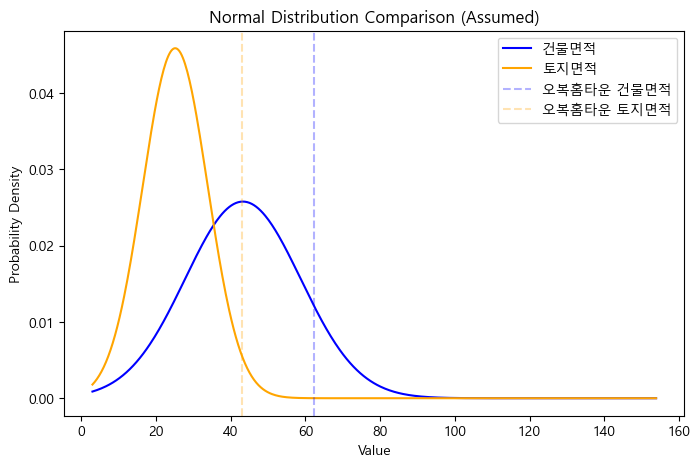

In [63]:
## 지금 이 코드는 이해하지 않아도 됩니다! 복붙해서 그림만 봐주세요

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data_A = multiplex_house_df_cleaned['건물면적']
data_B = multiplex_house_df_cleaned['토지면적']


# 두 변수의 평균과 표준편차
mu_A, sigma_A = np.mean(data_A), np.std(data_A)
mu_B, sigma_B = np.mean(data_B), np.std(data_B)

# x 범위 (두 분포를 모두 포함하도록)
x = np.linspace(
    min(min(data_A),min(data_B)),
    max(max(data_A),max(data_B)),
    500
)

# PDF 계산
pdf_A = norm.pdf(x, mu_A, sigma_A)
pdf_B = norm.pdf(x, mu_B, sigma_B)

# 시각화
plt.figure(figsize=(8,5))
plt.plot(x, pdf_A, label="건물면적",color ='blue')
plt.plot(x, pdf_B, label="토지면적",color ='orange')

plt.axvline(x=target['건물면적'].values,linestyle = "--", alpha=0.3, label="오복홈타운 건물면적",color ='blue')
plt.axvline(x=target['토지면적'].values,linestyle = "--", alpha=0.3, label="오복홈타운 토지면적",color='orange')


plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Normal Distribution Comparison (Assumed)")
plt.legend()
plt.show()


서로 다른 분포를 그리고 있으므로 비교 불가 
표준화를 해봅시다

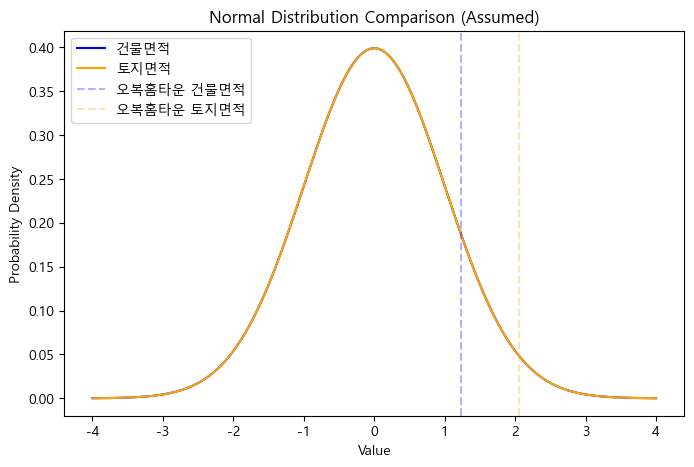

In [66]:
## 지금 이 코드는 이해하지 않아도 됩니다! 복붙해서 그림만 봐주세요

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data_A = multiplex_house_df_cleaned['건물면적_표준화']
data_B = multiplex_house_df_cleaned['토지면적_표준화']
# 두 변수의 평균과 표준편차
mu_A, sigma_A = 0,1
mu_B, sigma_B = 0,1

# x 범위 (두 분포를 모두 포함하도록)
x = np.linspace(
    -4,4,500
)

# PDF 계산
pdf_A = norm.pdf(x, mu_A, sigma_A)
pdf_B = norm.pdf(x, mu_B, sigma_B)

# 시각화
plt.figure(figsize=(8,5))
plt.plot(x, pdf_A, label="건물면적",color ='blue')
plt.plot(x, pdf_B, label="토지면적",color ='orange')

plt.axvline(x=target['건물면적_표준화'].values,linestyle = "--", alpha=0.3, label="오복홈타운 건물면적",color ='blue')
plt.axvline(x=target['토지면적_표준화'].values,linestyle = "--", alpha=0.3, label="오복홈타운 토지면적",color='orange')


plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Normal Distribution Comparison (Assumed)")
plt.legend()
plt.show()


- 오.. 정규분포모양이 됐죠? 제 평균이 0, 표준편차가 1이라는 뜻
- 두 개의 그래프가 합쳐져서 하나의 정규분포를 따르게 된다. 그대신 건물면적/토지면적의 평균값을 점선으로 나타내는 그래프.
    - 왜 하나의 그래프로 나올까?
        - 건물면적과 토지면적은 평균도 다르고 퍼진 정도도 다 달라서 비교가 안됨(서로 다른 그래프)
        - 표준화를 통해 평균 0, 표준편차 1(정규분포)로 만들었음
        - 그러니까 둘이 같은 모양을 띠게 됨(둘 다 표준정규분포를 따르니까)
        - 합친 부분에서 점선으로 실제 각각의 그래프의 위치(전체 중 어디에 있는지)를 비교할 수 있음

- 여기까지 이해한 이후, 그래프를 해석해본 것
    - 중앙보다 파란 점선(건물면적), 노란애(토지면적)이 평균보다 높다
    - 근데 파란점선보다 노란 게 더 오른쪽으로 치우쳐져있으니까 건물에 비해 토지가 더 넓다는 의미?
    - 막 꼬리쪽은 아니니까 그래도 적당히 큰? 정도인듯 (이건 정확히 모르겟음)
        - 더 자세히 보자. 파란애는 1.3? 정도 노란애는 2.1~2.2 정도임


- 수업 때 결과적으로 내 생각을 적을 수 있는 시간이 생겨서(질문타임이나 여러 설명들 사이에(이미아는거)) 굿인듯
- 그러면서 귀로 또 들으면서 음음 그렇지 리마인드도 할 수 있다니 정말 럭키박하사탕이잖아
- 재밋다 실제로 알고 들으니까 (통계... 복습해야겠지?)

##### 튜터님의 정리
- 연립다세대주택 중에서 오복홈타운의 건물 면적과 토지면적은 평균보다 높은가?  
  - 그렇다
- 만약 둘 다 평균보다 높다고 나온다면, 오복홈타운의 건물면적과 토지면적 중 어떤 면적이 평균에서 더 멀리 떨어져있을까?
  - 토지면적이 더 멀리 떨어졌다. 표준화 점수를 비교해보니 토지면적의 표준화점수가 건물면적의 표준화 점수보다 높게 나왔다. 토지면적이 토지면적의 평균에서 떨어진 정도가 건물면적이 건물면적의 평균에서 떨어진 정도보다 더 크다는 걸 의미한다. 

## 신뢰구간 구하기

- 가설 설정부터! (해야 이해가 잘됨..)
    - H0(귀무가설) : 서울시 모든 연립다세대 주택의 물건 금액 평균(뮤)는 계산한 표본평균과 차이가 없을 것이다 (평범~허다)
        - 표본평균은 모집단의 진짜 평균과 동일할 것이다
    - H1(대립가설) : 서울시 모든 연립다세대 주책의 물건 금액 평균은 게산한 표본평균과 유의미한 차이가 있을 것이다.
        - 표본평균은 모집단의 진짜 평균과 통계적으로 유의미한 차이가 있을 것이다. (우연이 아님! 이라는 뜻)

- 모집단 : 서울시 내 모든 연립다세대 주택(요기 구역? 동네? 땅덩어리) 거래
    - 표본은 multiplex_house_df : 요 데이터(구역 내 연립다세대 주택 거래 정보)
        - 이것의 평균(표본평균)과 표준편차(s)로 모수를 추측할 수 있음
- 모수 : 모집단의 특성(알려고 하는 정보/추측하고 싶은 정보)
    - 모표준편차(시그마) : 실제로 얼마나 다양하게 퍼져있을까요~
- 

In [68]:
multiplex_house_df

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일
0,성원빌라(86-125),11380,은평구,10200,녹번동,4.00,연립다세대,16400,53.07,25.00,2024-10-14
1,팔팔빌라,11500,강서구,10300,화곡동,2.00,연립다세대,35000,39.24,27.00,2024-10-14
2,다솔시티하임,11560,영등포구,11100,당산동1가,5.00,연립다세대,30000,29.54,14.00,2024-10-14
9,진광,11500,강서구,10600,내발산동,1.00,연립다세대,15900,37.98,20.00,2024-10-14
11,오복홈타운,11590,동작구,10200,상도동,2.00,연립다세대,30000,62.30,43.00,2024-10-14
...,...,...,...,...,...,...,...,...,...,...,...
77516,세종에버그린(101동),11215,광진구,10700,화양동,8.00,연립다세대,30000,27.55,9.88,2023-01-24
77517,금석연립(170-33),11530,구로구,10700,개봉동,2.00,연립다세대,9740,53.61,124.00,2022-07-08
77518,금석연립(170-33),11530,구로구,10700,개봉동,1.00,연립다세대,9190,53.61,124.00,2022-07-08
77519,금석연립(170-33),11530,구로구,10700,개봉동,1.00,연립다세대,9190,53.61,124.00,2022-07-08


- 지금 우리가 알고 싶은 건 서울에 있는 모든 연립 다세대 주택의 물건금액 평균을 알아내는 것이다.
- 하지만 우리는 약 2만개의 데이터만 가지고 있다.
- 이 데이터를 가지고, 연립 다세대 주택의 '물건 금액 평균'을 추정해보자.
    - 물건 금액 평균을 추정하고 싶은 게 우리의 가설 목적이구나

- 우선 건물명, 자치구, 법정동, 층이 일치하는 데이터는 계약일이 가장 최근인 데이터만 남긴다. 

##### 그래서 결국 가설검정으로 증명하고 싶은 건 무엇인가?
- 표본평균은 믿을만한가? (서울 전체의 뭐냐 그 어쩌구연립주택의 평균을 설명하기에? 그걸로 따지기에? 아 말이 안나오네) 바로 이것이 표본의 대표성(이었던 것 같다)
- 가설검정으로 모집단의 평균을 추정하고(신뢰'구간'으로 95%) 설명할 수 있다 대표할 수 있다

In [73]:
### 중복 제거(같은 매물 데이터)
multiplex_house_only_df = multiplex_house_df.sort_values(['건물명','자치구코드','법정동코드','층','계약일']).drop_duplicates(subset=['건물명','자치구코드','법정동코드','층'],keep='last')

In [74]:
multiplex_house_only_df

,건물명,자치구코드,자치구명,법정동코드,법정동명,층,건물용도,물건금액,건물면적,토지면적,계약일
63288,(1-10),11410,서대문구,11700,연희동,3.00,연립다세대,27500,57.66,18.00,2024-03-08
53314,(1-109),11170,용산구,10200,용산동2가,3.00,연립다세대,52000,72.95,73.95,2024-04-13
74777,(1-12),11305,강북구,10300,수유동,5.00,연립다세대,49500,63.82,44.35,2024-01-07
35213,(1-1382),11170,용산구,10200,용산동2가,1.00,연립다세대,30000,30.79,24.00,2024-06-15
69068,(1-155),11200,성동구,10900,금호동1가,-1.00,연립다세대,21200,58.32,18.51,2024-02-07
...,...,...,...,...,...,...,...,...,...,...,...
15082,힐하우스(200-413),11440,마포구,12500,성산동,2.00,연립다세대,28000,34.45,21.00,2024-08-05
7653,힐하우스(200-413),11440,마포구,12500,성산동,4.00,연립다세대,45000,41.60,25.00,2024-08-27
3454,힐하우스(377-12),11500,강서구,10300,화곡동,4.00,연립다세대,20500,29.96,14.00,2024-09-11
28006,힐하우스(5-211),11170,용산구,11900,효창동,3.00,연립다세대,77000,51.27,29.00,2024-07-03


In [75]:
sample_data = multiplex_house_only_df['물건금액']

#표본 개수 
n = len(sample_data)

#표본의 평균
sample_mean = np.mean(sample_data)

#표본의 표준편차
s = np.std(sample_data,ddof=1)

#표준오차의 근사값
se = s/np.sqrt(n)

# 신뢰구간 구하기
stats.t.interval(confidence=0.95, df = n-1, loc = sample_mean , scale=se)

(np.float64(34672.33424613993), np.float64(35596.88922266374))

95% 신뢰수준에서 '서울 연립 다세대 주택의 물건금액'의 '평균'은 34,671만원에서 35,596만원 사이에 있다. 

##### 중심극한정리
- ..원피스는....실존한다...!!
- 표본을 충분히 많이 뽑아서 평균을 내면 그 평균의 분포는 결국 정규분포를 따른다
- 표본을 개~~~많이 뽑아도 결국 정규분포로 향하고
- 결국 Z-score나 신뢰구간은 데이터 정규분포일 때를 가정한 것이므로? 어쨌든 데이터 개많이 뽑으면 너도 결국 정규분포다. 마음껏 표준화해주지... 신뢰구간 정해주지... <- 가 됨


- 수식을 이해하는 것보다 목적이랑 결과를 이해하는 게 더 중요한 것 같슴다
- 잼밋다 통게
🎵  🦀💨
💨🦀  🎵
🎵  🦀💨
- 다음주에는 가설검정, 상관분석, 상관계수, A/B 테스트
- t-test 정리해야징 헤헤 재밋다
(지금이야 재밌지... 라고 생각함 난이도가 많이 안어려워서 그런듯 복잡하게 들어가면 머리아프겟지(그게 재밋지만..) 파이썬으로 통계분석하는 것도 살짝 아직 낯설어서 수업 열심히 들으면 재밌음 아맞다 그랬지? 오 이게 다르네? 아 이건 똑같네 하면서)

- 결국? 